In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
dataset = pd.read_excel('/content/drive/MyDrive/major_project/yelp.xlsx')

## **Check Imbalance**

In [4]:
lst = list(dataset['Column2'])

In [5]:
_0,_1 = 0,0
for i in lst:
  if i == 0:
    _0+=1
  else:
    _1+=1

In [6]:
_0,_1

(500, 500)

## **Preprocessing**

In [11]:
def word_token(x):
  return nltk.word_tokenize(x)
def lower(x):
  return x.lower()
import re
def punct(x):
  return re.sub(r'[+*/\\\-?.>,<\"\';:!@#$%^&()_`~]', ' ', x)

In [13]:
dataset['punctuation_rem'] = dataset.apply(lambda row: punct(row['Column1']), axis=1)

In [14]:
dataset['lowercase'] = dataset.apply(lambda row: lower(row['punctuation_rem']), axis=1)
dataset

,Column1,Column2,punctuation_rem,lowercase
0,Wow... Loved this place.,1,Wow Loved this place,wow loved this place
1,Crust is not good.,0,Crust is not good,crust is not good
2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...
...,...,...,...,...
995,I think food should have flavor and texture an...,0,I think food should have flavor and texture an...,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,Appetite instantly gone,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,Overall I was not impressed and would not go b...,overall i was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ...",0,The whole experience was underwhelming and I ...,the whole experience was underwhelming and i ...


In [15]:
dataset['tokenized'] = dataset.apply(lambda row: word_token(row['lowercase']), axis=1)
dataset

,Column1,Column2,punctuation_rem,lowercase,tokenized
0,Wow... Loved this place.,1,Wow Loved this place,wow loved this place,"[wow, loved, this, place]"
1,Crust is not good.,0,Crust is not good,crust is not good,"[crust, is, not, good]"
2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,not tasty and the texture was just nasty,"[not, tasty, and, the, texture, was, just, nasty]"
3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,"[stopped, by, during, the, late, may, bank, ho..."
4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an..."
...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,I think food should have flavor and texture an...,i think food should have flavor and texture an...,"[i, think, food, should, have, flavor, and, te..."
996,Appetite instantly gone.,0,Appetite instantly gone,appetite instantly gone,"[appetite, instantly, gone]"
997,Overall I was not impressed and would not go b...,0,Overall I was not impressed and would not go b...,overall i was not impressed and would not go b...,"[overall, i, was, not, impressed, and, would, ..."
998,"The whole experience was underwhelming, and I ...",0,The whole experience was underwhelming and I ...,the whole experience was underwhelming and i ...,"[the, whole, experience, was, underwhelming, a..."


## **TF-IDF**

In [19]:
#Performing word vectorization using TF-IDF
vectorizer = TfidfVectorizer(analyzer='word')
tfidf_vectorized = vectorizer.fit_transform(dataset['lowercase'])
print(tfidf_vectorized)

#displaying vectorized dataset as dataframe
feature_names = vectorizer.get_feature_names()
dense = tfidf_vectorized.todense().tolist()
df = pd.DataFrame(dense, columns=feature_names)
display(df)

  (0, 1331)	0.33924917943793786
  (0, 1799)	0.31213680923998094
  (0, 1047)	0.5727163497116121
  (0, 2013)	0.6778470250293764
  (1, 765)	0.38776447225033034
  (1, 1196)	0.3642259788974013
  (1, 944)	0.3302813425168802
  (1, 427)	0.7796745379592049
  (2, 1170)	0.5215222019267477
  (2, 968)	0.3458367510034584
  (2, 1941)	0.18713427787373044
  (2, 1775)	0.5215222019267477
  (2, 1781)	0.14370731947893803
  (2, 64)	0.16724341982474072
  (2, 1762)	0.4336794764651031
  (2, 1196)	0.25437540376667894
  (3, 946)	0.13076036861337076
  (3, 1445)	0.2860570234974867
  (3, 1692)	0.31645653635056953
  (3, 1489)	0.31645653635056953
  (3, 1209)	0.245871053386107
  (3, 868)	0.31645653635056953
  (3, 139)	0.31645653635056953
  (3, 1088)	0.26827444843824244
  (3, 992)	0.2986739612913253
  :	:
  (999, 537)	0.2674017313395308
  (999, 2012)	0.2674017313395308
  (999, 1364)	0.2674017313395308
  (999, 1945)	0.2674017313395308
  (999, 807)	0.2674017313395308
  (999, 236)	0.22668848244952555
  (999, 1012)	0.25237

,00,10,100,11,12,15,17,1979,20,2007,23,30,30s,35,40,40min,45,4ths,5lb,70,85,90,99,about,above,absolute,absolutely,absolutley,accident,accommodations,accomodate,accordingly,accountant,ache,acknowledged,across,actual,actually,added,affordable,...,wonderful,wontons,word,words,work,worker,workers,working,works,world,worries,worse,worst,worth,would,wouldn,wound,wow,wrap,wrapped,writing,wrong,ya,yama,yay,yeah,year,years,yellow,yellowtail,yelpers,yet,you,your,yourself,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.677847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.34865,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df['look'].sum()

1.2890000453865238

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,dataset['Column2'],test_size = 0.2, random_state = 42)

## **KNN**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [25]:
best_accuracy = 0
best_k = 0
accuracies = []
for k in range(1,50+1):
  bestknn = KNeighborsClassifier(k,metric='euclidean')
  bestknn.fit(X_train, y_train)
  y_pred = bestknn.predict(X_test)
  
  acc = accuracy_score(y_test,y_pred)
  accuracies.append(acc)
  print("Accuracy:",acc,"for k =",k)
  if best_accuracy < acc:
    best_accuracy = acc
    best_k = k
    best_pred = y_pred
    fin_knn = bestknn

Accuracy: 0.71 for k = 1
Accuracy: 0.71 for k = 2
Accuracy: 0.76 for k = 3
Accuracy: 0.755 for k = 4
Accuracy: 0.73 for k = 5
Accuracy: 0.745 for k = 6
Accuracy: 0.74 for k = 7
Accuracy: 0.745 for k = 8
Accuracy: 0.74 for k = 9
Accuracy: 0.745 for k = 10
Accuracy: 0.725 for k = 11
Accuracy: 0.74 for k = 12
Accuracy: 0.7 for k = 13
Accuracy: 0.72 for k = 14
Accuracy: 0.72 for k = 15
Accuracy: 0.715 for k = 16
Accuracy: 0.695 for k = 17
Accuracy: 0.725 for k = 18
Accuracy: 0.705 for k = 19
Accuracy: 0.735 for k = 20
Accuracy: 0.72 for k = 21
Accuracy: 0.73 for k = 22
Accuracy: 0.73 for k = 23
Accuracy: 0.72 for k = 24
Accuracy: 0.715 for k = 25
Accuracy: 0.72 for k = 26
Accuracy: 0.71 for k = 27
Accuracy: 0.73 for k = 28
Accuracy: 0.71 for k = 29
Accuracy: 0.745 for k = 30
Accuracy: 0.71 for k = 31
Accuracy: 0.73 for k = 32
Accuracy: 0.705 for k = 33
Accuracy: 0.715 for k = 34
Accuracy: 0.7 for k = 35
Accuracy: 0.735 for k = 36
Accuracy: 0.71 for k = 37
Accuracy: 0.735 for k = 38
Accurac

In [26]:
print(best_k)
print(y_pred)

3
[0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1
 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0
 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1
 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1]


In [27]:
# rev = vectorizer.transform(["Food is very good at this place"])
# rev = rev.todense().tolist()
# fin_knn.predict(rev)

Error Analysis


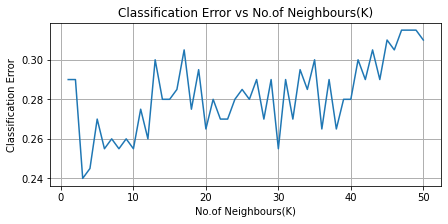

In [28]:
print("Error Analysis")

plt.rcParams['figure.figsize'] = [7, 3]
plt.plot(range(1,50+1),1-np.array(accuracies))
plt.title('Classification Error vs No.of Neighbours(K)')
plt.xlabel('No.of Neighbours(K)')
plt.grid(linestyle='-', linewidth=1)
plt.ylabel('Classification Error')
plt.show()

In [29]:
print('For KNN, Best k is ',best_k,'and its accuracy is: ',best_accuracy)

For KNN, Best k is  3 and its accuracy is:  0.76


## **SVM- Support Vector Machine**

In [30]:
from sklearn.svm import SVC

In [31]:
best_par,best_accuracy = 0,0
accuracies = list()
for par in [0.1,0.2,0.002,0.5,0.6,0.65,0.7,0.75,0.8]: 
  svc_classifier = SVC(C=par, kernel='rbf')
  svc_classifier.fit(X_train, y_train)
  best_y_pred = svc_classifier.predict(X_test)
  acc = accuracy_score(y_test,best_y_pred)
  accuracies.append(acc)
  print("Accuracy:",acc,"for C =",par)
  if best_accuracy < acc:
    best_accuracy = acc
    best_par = par
    best_pred = best_y_pred
    fin_svm = svc_classifier

Accuracy: 0.48 for C = 0.1
Accuracy: 0.55 for C = 0.2
Accuracy: 0.48 for C = 0.002
Accuracy: 0.75 for C = 0.5
Accuracy: 0.785 for C = 0.6
Accuracy: 0.78 for C = 0.65
Accuracy: 0.78 for C = 0.7
Accuracy: 0.78 for C = 0.75
Accuracy: 0.78 for C = 0.8


In [32]:
print('For SVM, Best C is ',best_par,'and its accuracy is: ',best_accuracy)

For SVM, Best C is  0.6 and its accuracy is:  0.785


In [33]:
rev = vectorizer.transform(["Food is very good at this place"])
rev = rev.todense().tolist()
fin_svm.predict(rev)

array([1])

## **MLP- Multilayer Perceptron**

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
# # Applying GridSearch for better parameters
# scoring = {'accuracy': 'accuracy'}
# param_grid = {'learning_rate_init':[0.001,0.0001,0.01,0.002], 'hidden_layer_sizes':[128,(100,50),(64,32),(50,32),(50,50,50),(32,16,8)],
#               'activation':['relu','tanh','sigmoid'],
#               'alpha': [0.0001, 0.05,0.07],
#               'learning_rate': ['constant','adaptive']} 
# grid = GridSearchCV(MLPClassifier(verbose=True,early_stopping=True), param_grid, scoring=scoring, refit='accuracy')
# grid.fit(X_train,y_train)

In [36]:
# print(grid.best_params_)
# print(grid.best_estimator_)
# print(grid.best_score_)

In [37]:
mlp2 = MLPClassifier(hidden_layer_sizes= (100,50), activation='relu', solver='adam',learning_rate='adaptive',early_stopping=True,alpha=0.07,
                    learning_rate_init=0.01, max_iter=200, shuffle=True, random_state=10, tol=0.0001, verbose=True)
mlp2.fit(X_train,y_train)

Iteration 1, loss = 0.72295933
Validation score: 0.750000
Iteration 2, loss = 0.56195989
Validation score: 0.737500
Iteration 3, loss = 0.33180423
Validation score: 0.800000
Iteration 4, loss = 0.15965465
Validation score: 0.862500
Iteration 5, loss = 0.10067082
Validation score: 0.825000
Iteration 6, loss = 0.08752156
Validation score: 0.825000
Iteration 7, loss = 0.08086054
Validation score: 0.837500
Iteration 8, loss = 0.07260285
Validation score: 0.812500
Iteration 9, loss = 0.06455443
Validation score: 0.875000
Iteration 10, loss = 0.05678605
Validation score: 0.850000
Iteration 11, loss = 0.05096025
Validation score: 0.825000
Iteration 12, loss = 0.04642279
Validation score: 0.812500
Iteration 13, loss = 0.04304821
Validation score: 0.837500
Iteration 14, loss = 0.04043668
Validation score: 0.825000
Iteration 15, loss = 0.03835692
Validation score: 0.850000
Iteration 16, loss = 0.03694278
Validation score: 0.875000
Iteration 17, loss = 0.03592257
Validation score: 0.837500
Iterat

MLPClassifier(activation='relu', alpha=0.07, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='adaptive',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [38]:
# Accuracy calculation
y_pred = mlp2.predict(X_test)
print ("Accuracy for the test set : ",(y_pred == y_test).mean())
print("0 = negative and 1 = positive")
print ("Predicted output : ", y_pred)
print ("True output : ", list(y_test))

Accuracy for the test set :  0.825
0 = negative and 1 = positive
Predicted output :  [1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1]
True output :  [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 

In [45]:
inp = input("Enter your review : ")
rev = vectorizer.transform([inp])
rev = rev.todense().tolist()
mlp2.predict(rev)

Enter your review : I loved the food and the service is the best


array([1])

In [40]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return(score)
def VADER_for_pos(x):
  dct = sentiment_analyzer_scores(x)
  return(dct['pos'])
def VADER_for_neg(x):
  dct = sentiment_analyzer_scores(x)
  return(dct['neg'])

     |████████████████████████████████| 133kB 3.9MB/s 


In [46]:
VADER_for_pos(inp)

0.503

In [47]:
VADER_for_neg(inp)

0.0